In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, linear

2025-02-08 23:56:35.247379: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739055395.266218 2048627 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739055395.270276 2048627 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-08 23:56:35.285867: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
tf.config.set_visible_devices([], 'GPU')  # Отключаем GPU

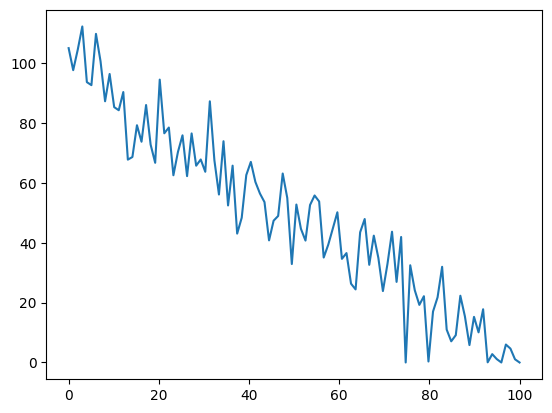

In [6]:
# 🔹 Генерация данных: Цена товара (X) и объем продаж (Y)
np.random.seed(42)
X = np.linspace(0, 100, 100).reshape(-1, 1)  # Цена товара от 0 до 100

Y = np.maximum(100 - X + np.random.normal(0, 10, X.shape), 0)  # Реакция спроса
fig = plt.figure()
ax = fig.add_subplot()

# Plot t.  
ax.plot(X, Y)





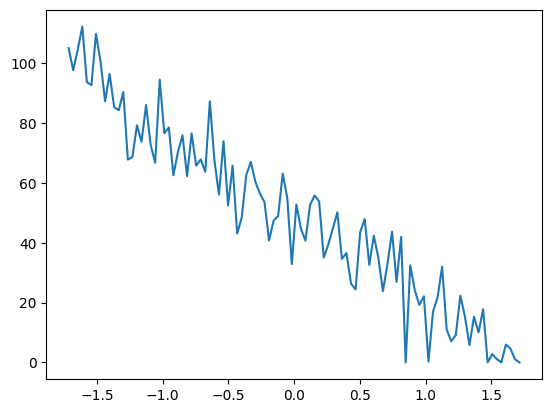

In [7]:
Mean=np.mean(X)
STD=np.std(X) 
X_ = (X - Mean) / STD 
fig = plt.figure()
ax = fig.add_subplot()

# Plot t.  
ax.plot(X_, Y)

In [9]:
# 🔹 Создаем нейронную сеть с ReLU
model = Sequential([
    Dense(10, activation="relu", input_shape=(1,)),  # 10 нейронов, ReLU kernel_initializer="he_uniform", 
    Dense(5, activation="relu", input_shape=(1,)),
    Dense(2, activation="relu", input_shape=(1,)),

    Dense(1, activation=linear)  # 🔹 Выходной слой (линейная регрессия)
])



/home/tknyshenko/graice-installs/graice/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer="adam", loss="mse")
model.fit(X_, Y, epochs=1000, verbose=0)  # Обучаем модель

# 🔹 Предсказание модели
Y_pred = model.predict(X_)



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


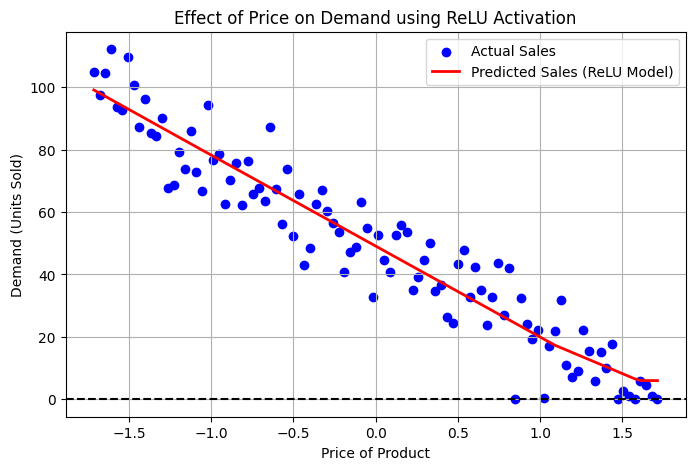

In [13]:
# 🔹 Визуализация результата
plt.figure(figsize=(8, 5))
plt.scatter(X_, Y, label="Actual Sales", color="blue")
plt.plot(X_, Y_pred, label="Predicted Sales (ReLU Model)", color="red", linewidth=2)
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Price of Product")
plt.ylabel("Demand (Units Sold)")
plt.title("Effect of Price on Demand using ReLU Activation")
plt.legend()
plt.grid(True)
plt.show()

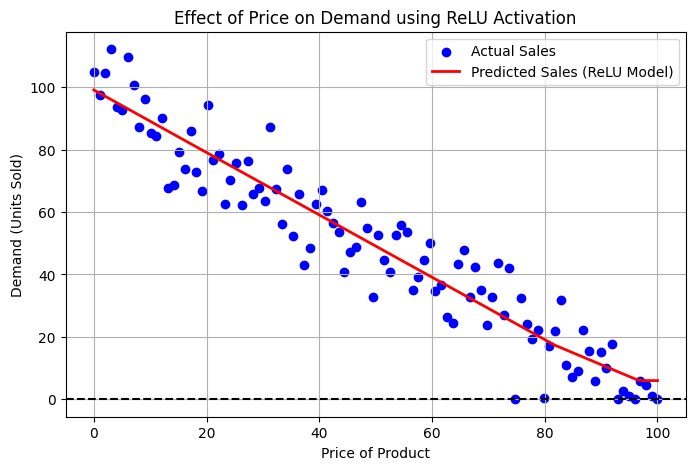

In [15]:
# 🔹 Визуализация результата

plt.figure(figsize=(8, 5))
plt.scatter(X, Y, label="Actual Sales", color="blue")
plt.plot(X, Y_pred, label="Predicted Sales (ReLU Model)", color="red", linewidth=2)
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Price of Product")
plt.ylabel("Demand (Units Sold)")
plt.title("Effect of Price on Demand using ReLU Activation")
plt.legend()
plt.grid(True)
plt.show()

In [45]:
preferred_model = Sequential([ 
    
        Dense(25, activation = 'relu', input_shape=(1,)),
        Dense(15, activation = 'relu', input_shape=(1,)),
        Dense(1, activation = 'linear')   #<-- Note  # <-- softmax для классификации
    ]
)

# # model = Sequential([
#     Dense(10, activation="relu", input_shape=(1,)),  # 10 нейронов, ReLU kernel_initializer="he_uniform", 
#     Dense(5, activation="relu", input_shape=(1,)),
#     Dense(2, activation="relu", input_shape=(1,)),

#     Dense(1, activation=linear)  # 🔹 Выходной слой (линейная регрессия)
# ])



preferred_model.compile(
    loss="mse",  # <-- Для регрессии
    optimizer=tf.keras.optimizers.Adam(0.001),
    
)

preferred_model.fit(
    X_,Y,
    epochs=1000, verbose=0)
    
    
p_preferred = preferred_model.predict(X_)



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


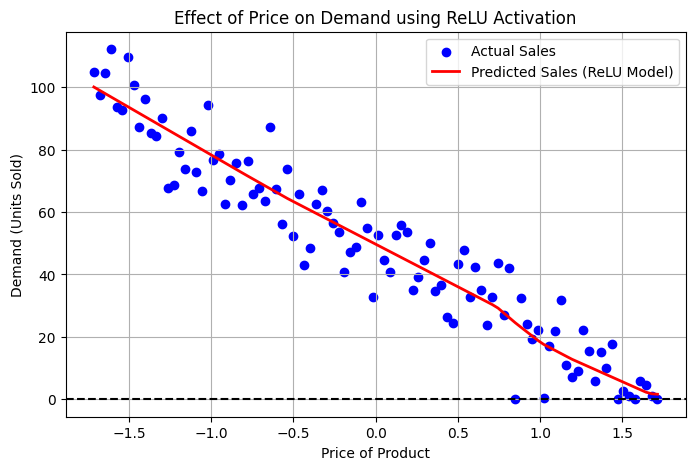

In [46]:
# 🔹 Визуализация результата

plt.figure(figsize=(8, 5))
plt.scatter(X_, Y, label="Actual Sales", color="blue")
plt.plot(X_, p_preferred, label="Predicted Sales (ReLU Model)", color="red", linewidth=2)
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Price of Product")
plt.ylabel("Demand (Units Sold)")
plt.title("Effect of Price on Demand using ReLU Activation")
plt.legend()
plt.grid(True)
plt.show()